<a href="https://colab.research.google.com/github/Ifedaniel/Predictive-Modelling-of-Breast-Cancer-Relapse-Using-Machine-Learning-and-Deep-Learning-Techniques/blob/main/cancer_relapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

#### **Predictive Modelling of Breast Cancer Relapse using Machine Learning and Deep Learning Techniques**

</center>

**Data Description**

Here is a detailed description of each column in the cancer dataset:

1. **study id:** The identifier for the study in which the patient participated.
2. **patient id:** Unique identifier for each patient.
3. **sample id:** Unique identifier for each sample taken from the patient.
4. **age at diagnosis:** The age of the patient at the time of cancer diagnosis.
5. **type of breast surgery:** The type of surgical procedure performed on the breast (e.g., breast conserving (lumpectomy), mastectomy).
6. **cancer type:** The general type or category of cancer diagnosed in the patient.
7. **cancer type detailed:** Detailed description or subtype of the diagnosed cancer.
8. **cellularity:** Measure of the density or proportion of cells in the tumor tissue.
9. **chemotherapy:** Indicates whether the patient received chemotherapy treatment.
10. **pam50 + claudin-low subtype:** Classification subtype of breast cancer based on gene expression analysis.
11. **cohort:** The specific group or cohort to which the patient belongs.
12. **er status measured by ihc:** Estrogen receptor (ER) status measured using immunohistochemistry (IHC) staining.
13. **er status:** Estrogen receptor (ER) status of the tumor.
14. **neoplasm histologic grade:** Histological grade of the tumor indicating its level of differentiation.
15. **her2 status measured by snp6:** Human epidermal growth factor receptor 2 (HER2) status measured using single nucleotide polymorphism (SNP) array.
16. **her2 status:** HER2 status of the tumor.
17. **tumor other histologic subtype:** Other histological subtypes present in the tumor tissue.
18. **hormone therapy:** Indicates whether the patient received hormone therapy as part of cancer treatment.
19. **inferred menopausal state:** Inferred menopausal status of the patient.
20. **integrative cluster:** Integrative cluster classification based on molecular profiling.
21. **primary tumor laterality:** The side of the body (left or right) where the primary tumor is located.
22. **lymph nodes examined positive:** Number of lymph nodes examined that tested positive for cancer cells.
23. **mutation count:** Total count of mutations detected in the tumor.
24. **nottingham prognostic index:** Prognostic index calculated based on tumor size, lymph node status, and histologic grade.
25. **oncotree code:** Code representing the type of cancer according to the OncoTree classification system.
26. **overall survival (months):** Number of months survived by the patient after diagnosis.
27. **overall survival status:** Survival status of the patient at the end of the study period.
28. **pr status:** Progesterone receptor (PR) status of the tumor.
29. **radio therapy:** Indicates whether the patient received radiotherapy treatment.
30. **relapse free status (months)**: Number of months until relapse occurred, if applicable.
31. **relapse free status:** Status indicating whether the patient experienced relapse during the study period.
32. **number of samples per patient:** Total number of samples collected from each patient.
33. **sample type:** Type or source of the sample (e.g., tissue, blood).
34. **sex:** Gender of the patient.
35. **3-gene classifier subtype:** Classification subtype based on gene expression analysis.
36. **tmb (nonsynonymous):** Total mutational burden (TMB) measured by the number of nonsynonymous mutations.
37. **tumor size:** Size or dimension of the tumor.
38. **tumor stage:** Stage of cancer indicating the extent of its spread.
39. **patient's vital status:** Vital status of the patient at the end of the study period.

These columns contain various clinical, pathological, and molecular characteristics of breast cancer patients, which can be used for predictive modeling and analysis.

In [ ]:
%%capture
pip install tensorflow==2.12.0

In [ ]:
# Installing all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from tabulate import tabulate
from google.colab import drive

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score,  precision_recall_fscore_support
from scipy.stats import uniform
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Set options for better display
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set a modern style for better aesthetics
sns.set(style="whitegrid")

# Set a seed for reproducibility
np.random.seed(42)

%matplotlib inline

In [ ]:
# Mounting the Drive contents
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Preliminary Data Analysis**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/cancer_relapse/brca_metabric_clinical_data.tsv", sep = '\t').rename(columns = str.lower)

In [ ]:
df.head()

,study id,patient id,sample id,age at diagnosis,type of breast surgery,cancer type,cancer type detailed,cellularity,chemotherapy,pam50 + claudin-low subtype,cohort,er status measured by ihc,er status,neoplasm histologic grade,her2 status measured by snp6,her2 status,tumor other histologic subtype,hormone therapy,inferred menopausal state,integrative cluster,primary tumor laterality,lymph nodes examined positive,mutation count,nottingham prognostic index,oncotree code,overall survival (months),overall survival status,pr status,radio therapy,relapse free status (months),relapse free status,number of samples per patient,sample type,sex,3-gene classifier subtype,tmb (nonsynonymous),tumor size,tumor stage,patient's vital status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,YES,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,0:LIVING,Negative,YES,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,YES,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,0:LIVING,Positive,YES,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,YES,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,1:DECEASED,Positive,NO,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,YES,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,0:LIVING,Positive,YES,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,YES,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,1:DECEASED,Positive,YES,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


>*The df.head() method above shows the first five patient records in the data. This gives a brief overview of what the data looks like and the kind of fields captured.*

In [ ]:
# Check the shape of the dataset
data_shape = df.shape

# Print the number of rows and columns
print(f"The dataset has {data_shape[0]:,} rows and {data_shape[1]:,} columns.")

The dataset has 2,509 rows and 39 columns.


Percentage of Missing Values in Each Column:
study id                           0.00
patient id                         0.00
sample id                          0.00
age at diagnosis                   0.44
type of breast surgery            22.08
cancer type                        0.00
cancer type detailed               0.00
cellularity                       23.60
chemotherapy                      21.08
pam50 + claudin-low subtype       21.08
cohort                             0.44
er status measured by ihc          3.31
er status                          1.59
neoplasm histologic grade          4.82
her2 status measured by snp6      21.08
her2 status                       21.08
tumor other histologic subtype     5.38
hormone therapy                   21.08
inferred menopausal state         21.08
integrative cluster               21.08
primary tumor laterality          25.47
lymph nodes examined positive     10.60
mutation count                     6.02
nottingham prognostic index        

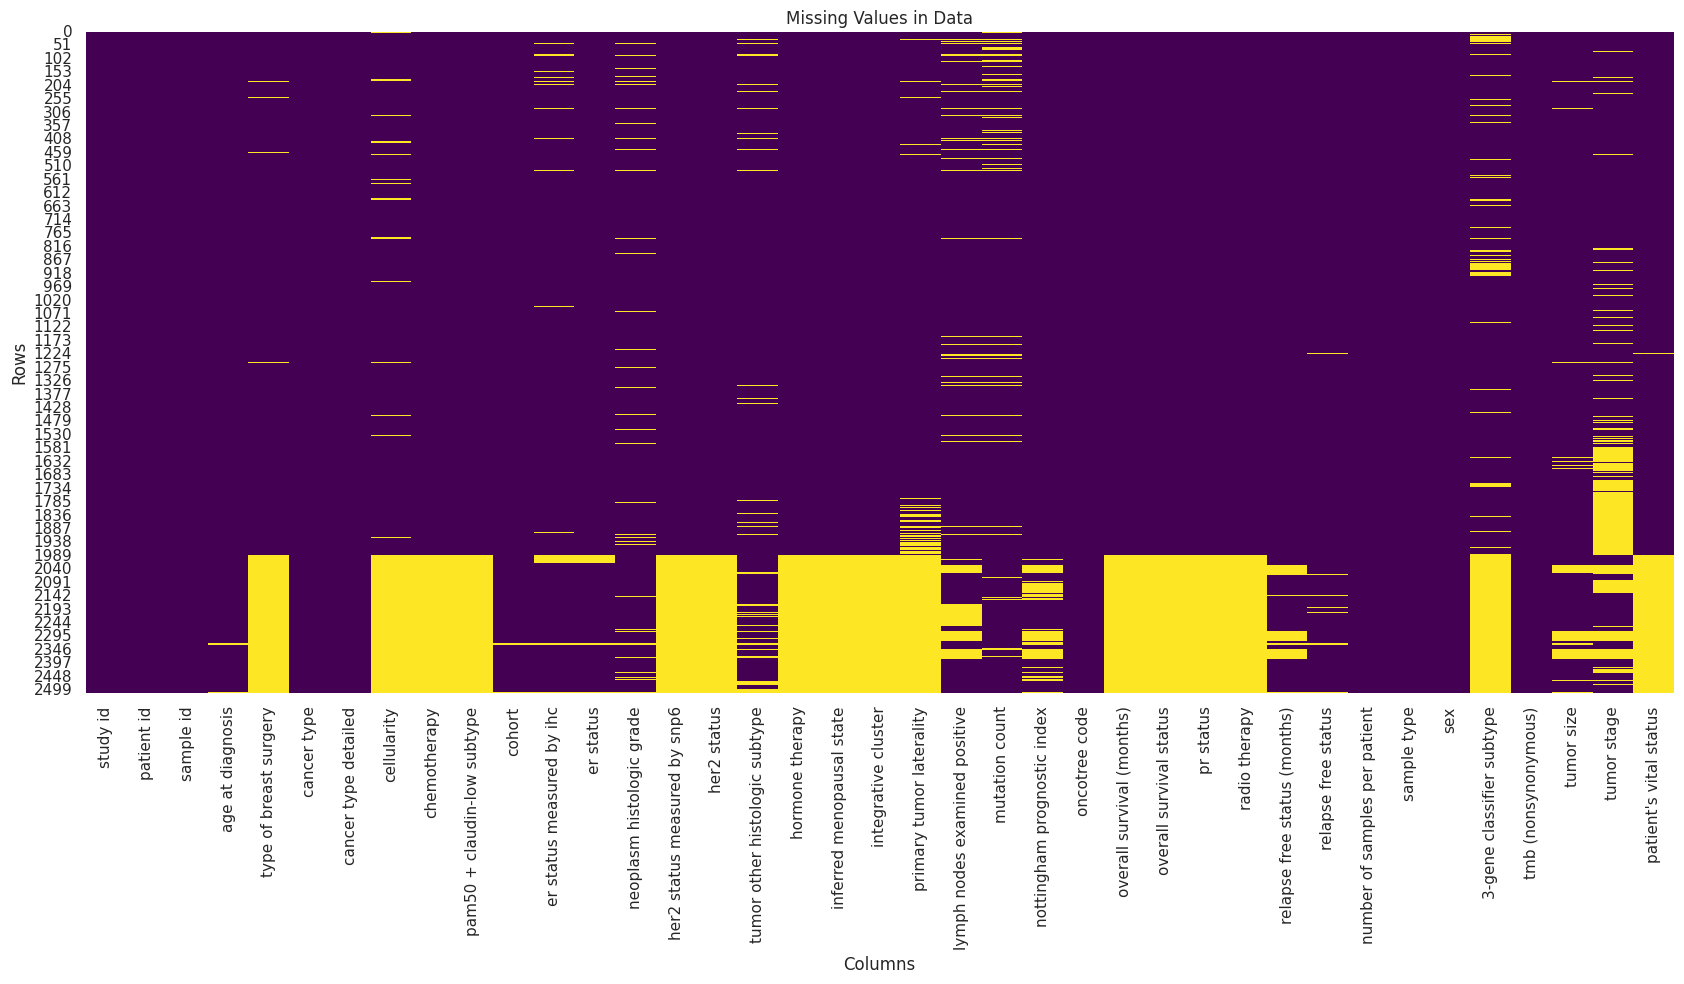

In [ ]:
# Calculate percentage of missing values in each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Print percentage of missing values in each column
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

# Create a heatmap of missing values
plt.figure(figsize=(17, 10))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

# Set the title and labels
plt.title('Missing Values in Data')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show plot
plt.tight_layout()
plt.show()

>*The heatmap of missing values shows that missing values are present in some columns in different degrees. For instance, age at diagnosis contain very minimal percentage (0.44%) of missing values while 3-gene classifier subtype contain a very high percentage (29.69%) of missing values. Different approaches of dealing with missing values will be applied to the data.*

**Data Cleaning & Treating Missing Values**


The best method to fill missing values in a column with float values depends on the distribution of the data and the presence of outliers. The missing values in the 'age at diagnosis' & 'nottingham prognostic index' columns will be treated using the mean imputation method. This choice was made because the 'age at diagnosis' data is normally distributed and approximately symmetric, with no significant outliers. For 'cohort', 'lymph nodes examined positive', 'mutation count' & 'tumor size', the median approach will be used to fill its missing values since the data is skewed and contains outlier. The median is robust to outliers and provides a better estimate of central tendency in such cases. For 'er status measured by ihc', 'er_status',  'neoplasm histologic grade'  & 'tumor other histologic subtype', we use mode since the data is categorical/discrete.

In [ ]:
def analyze_var(df, column_name):
    # Determine the best approach for imputation
    if df[column_name].isnull().any():
        print(f"\nMissing values present in '{column_name}' column.")
        print("Considering the distribution and presence of outliers:")
        if df[column_name].skew() > 1:
            print("The data is skewed. Median may be a suitable imputation method.")
        else:
            print("The data is approximately symmetric. Mean may be a suitable imputation method.")
    else:
        print(f"\nNo missing values present in '{column_name}' column.")

In [ ]:
analyze_var(df, 'age at diagnosis')


Missing values present in 'age at diagnosis' column.
Considering the distribution and presence of outliers:
The data is approximately symmetric. Mean may be a suitable imputation method.


In [ ]:
analyze_var(df, 'cohort')


Missing values present in 'cohort' column.
Considering the distribution and presence of outliers:
The data is skewed. Median may be a suitable imputation method.


In [ ]:
analyze_var(df, 'lymph nodes examined positive')


Missing values present in 'lymph nodes examined positive' column.
Considering the distribution and presence of outliers:
The data is skewed. Median may be a suitable imputation method.


In [ ]:
analyze_var(df, 'mutation count')


Missing values present in 'mutation count' column.
Considering the distribution and presence of outliers:
The data is skewed. Median may be a suitable imputation method.


In [ ]:
analyze_var(df, 'nottingham prognostic index')


Missing values present in 'nottingham prognostic index' column.
Considering the distribution and presence of outliers:
The data is approximately symmetric. Mean may be a suitable imputation method.


In [ ]:
analyze_var(df, 'tumor size')


Missing values present in 'tumor size' column.
Considering the distribution and presence of outliers:
The data is skewed. Median may be a suitable imputation method.


In [ ]:
# Columns to be treated using mean imputation method
columns_to_impute_mean = ['age at diagnosis', 'nottingham prognostic index']

# Iterate through the columns and fill missing values with mean for each column
for column in columns_to_impute_mean:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# List of columns to fill missing values with median
columns_to_impute_median = ['cohort', 'lymph nodes examined positive', 'mutation count', 'tumor size']

# Iterate through the columns and fill missing values with the median for each column
for column in columns_to_impute_median:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)


# Columns to be treated using mode imputation method
columns_to_impute_mode = ['er status measured by ihc', 'er status', 'neoplasm histologic grade', 'tumor other histologic subtype']

# Iterate through the columns and fill missing values with mode for each column
for column in columns_to_impute_mode:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Removing irrelevant such as study id, patient id, sample id, columns with missing values >= 20% & Removing the relapse free status (months) from the data
df.drop(['type of breast surgery',  'cellularity',  'chemotherapy',  'pam50 + claudin-low subtype', 'her2 status measured by snp6', 'her2 status', 'hormone therapy',
         'inferred menopausal state', 'integrative cluster', 'primary tumor laterality', 'overall survival (months)', 'overall survival status', 'pr status', 'radio therapy',
         '3-gene classifier subtype', 'tumor stage' , "patient's vital status", 'relapse free status (months)', 'study id', 'patient id', 'sample id'], axis = 1, inplace = True)

# Dropping records with NaN target values
df.dropna(subset=['relapse free status'], inplace=True)

# Identify columns with only one level of data representation
single_level_columns = [col for col in df.columns if df[col].nunique() == 1]

# Print the identified columns
print("Columns with only one level of data representation:")
print(single_level_columns)

# Drop columns with only one level of data representation
df.drop(single_level_columns, axis=1, inplace=True)

Columns with only one level of data representation:
['cancer type', 'number of samples per patient', 'sample type', 'sex']


In [ ]:
df.shape

(2488, 14)

>*The data now contains 2,488 records and 14 columns after the data cleaning process.*

**Exploratory Data Analysis**

Exploratory data analysis (EDA) is crucial for gaining insights into the dataset before building a model. It helps in understanding the structure, relationships, patterns, and distributions within the data. EDA allows us to identify outliers, missing values, and potential errors, which can impact the quality of the model. Additionally, EDA aids in feature selection, determining appropriate preprocessing techniques, and choosing suitable models for predictive analytics tasks. Overall, EDA serves as the foundation for building robust and accurate machine learninig models.

**Univariate Analysis: Analysing the target variable (relapse free status)**

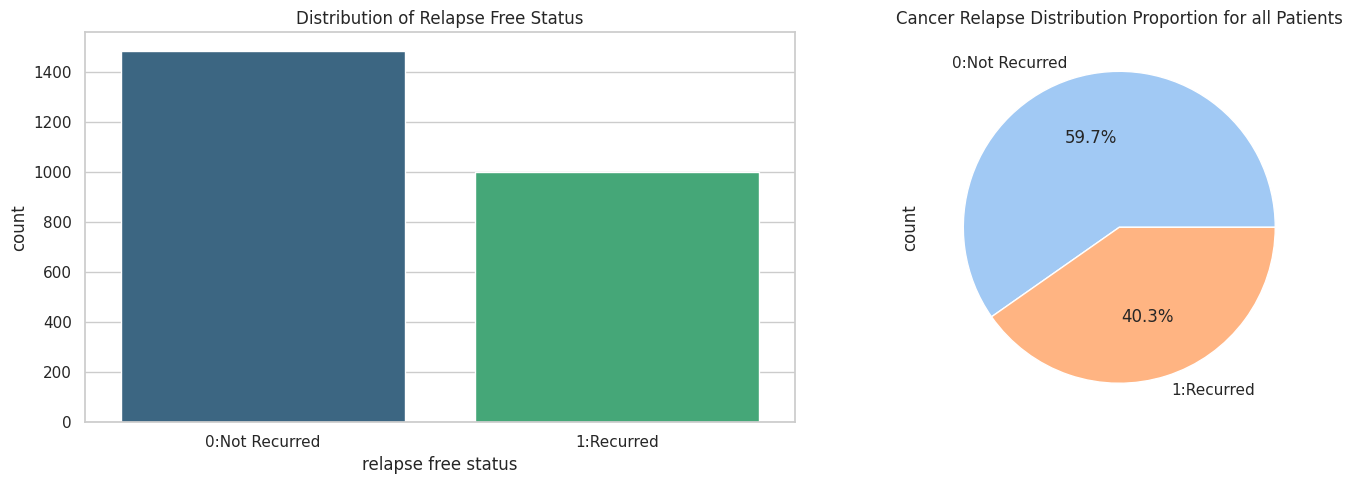

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Bar plot with a touch of color
sns.countplot(x='relapse free status', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Relapse Free Status')

# Pie chart for a tasty visual
df['relapse free status'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], colors=sns.color_palette('pastel'))

axes[1].set_title('Cancer Relapse Distribution Proportion for all Patients')

# Adjust layout for better appearance
plt.tight_layout()

# Display the plots
plt.show()


>*The chart above indicates that 59.7% of patients did not experience a replase while 40.3% of patients experienced a replase. With the distribution observed in the target label, we can see that the distribution is not perfectly balanced, but it is not severely imbalanced either. Generally, a distribution within a range of 40%-60% for each class is considered reasonably balanced for most machine learning algorithms.*

**Univariate Analysis: Analysing the distribution of Continuous variables**

In [ ]:
def analyze_distribution(df, column_name):
    """
    Analyze and visualize the distribution of a numerical column in a DataFrame.

    Parameters:
    - df: DataFrame
    - column_name: str, the name of the column to analyze

    Returns:
    - None
    """
    # Checking value distribution for the specified column
    print(f"Checking value distribution for column '{column_name}':")

    # Creating a figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Subplot 1: Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(df[column_name], color='skyblue')
    plt.title(f'Boxplot - {column_name} Distribution')
    plt.xlabel(column_name)

    # Subplot 2: Distribution Plot
    plt.subplot(1, 2, 2)
    sns.distplot(df[column_name], color='salmon', hist_kws={'edgecolor': 'black'})
    plt.title(f'Distribution Plot - {column_name} Distribution')
    plt.xlabel(column_name)

    # Print summary statistics
    print(f"\nSummary Statistics for '{column_name}':")
    print(df[column_name].describe())

    # Check for outliers
    outliers = df[(df[column_name] > df[column_name].quantile(0.75) + 1.5 * (df[column_name].quantile(0.75) - df[column_name].quantile(0.25))) |
                  (df[column_name] < df[column_name].quantile(0.25) - 1.5 * (df[column_name].quantile(0.75) - df[column_name].quantile(0.25)))]

    print(f"\nNumber of outlier values: {len(outliers)}")

    # Determine skewness and print the result
    skewness = df[column_name].skew()
    if skewness > 0:
        print("\nThe distribution is right-skewed.")
    elif skewness < 0:
        print("\nThe distribution is left-skewed.")
    else:
        print("\nThe distribution is approximately symmetric.")

    # Show the plots
    plt.tight_layout()
    plt.show()

Checking value distribution for column 'age at diagnosis':

Summary Statistics for 'age at diagnosis':
count    2488.000000
mean       60.442673
std        13.044048
min        21.930000
25%        50.920000
50%        61.130000
75%        70.025000
max        96.290000
Name: age at diagnosis, dtype: float64

Number of outlier values: 1

The distribution is left-skewed.


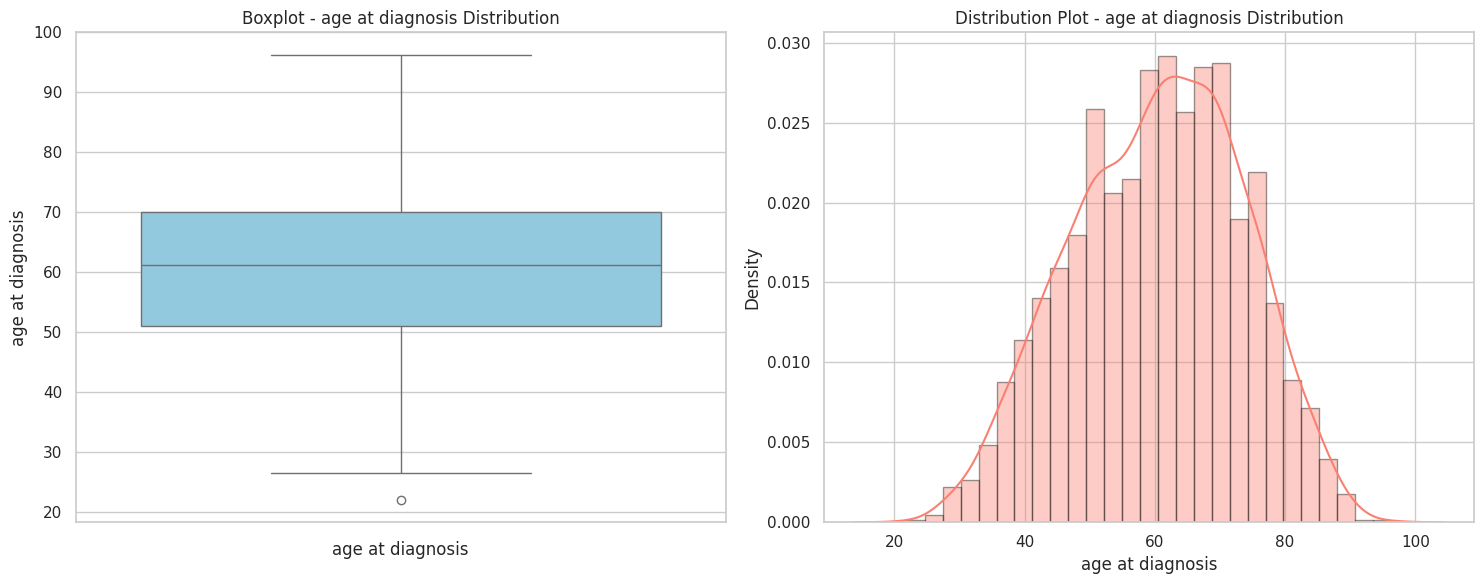

In [ ]:
analyze_distribution(df, 'age at diagnosis')

>*The chart above shows that the distribution of age at diagnosis is left-skewed, but it appears to be normally distributed and it contains just one outlier value. The average age recorded is 60.44, the minimum is 21.93 and the maximum is 96.29. These age values will be rounded up during the preprocessing stage before modelling.*

Checking value distribution for column 'lymph nodes examined positive':

Summary Statistics for 'lymph nodes examined positive':
count    2488.000000
mean        1.756029
std         3.858000
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        45.000000
Name: lymph nodes examined positive, dtype: float64

Number of outlier values: 239

The distribution is right-skewed.


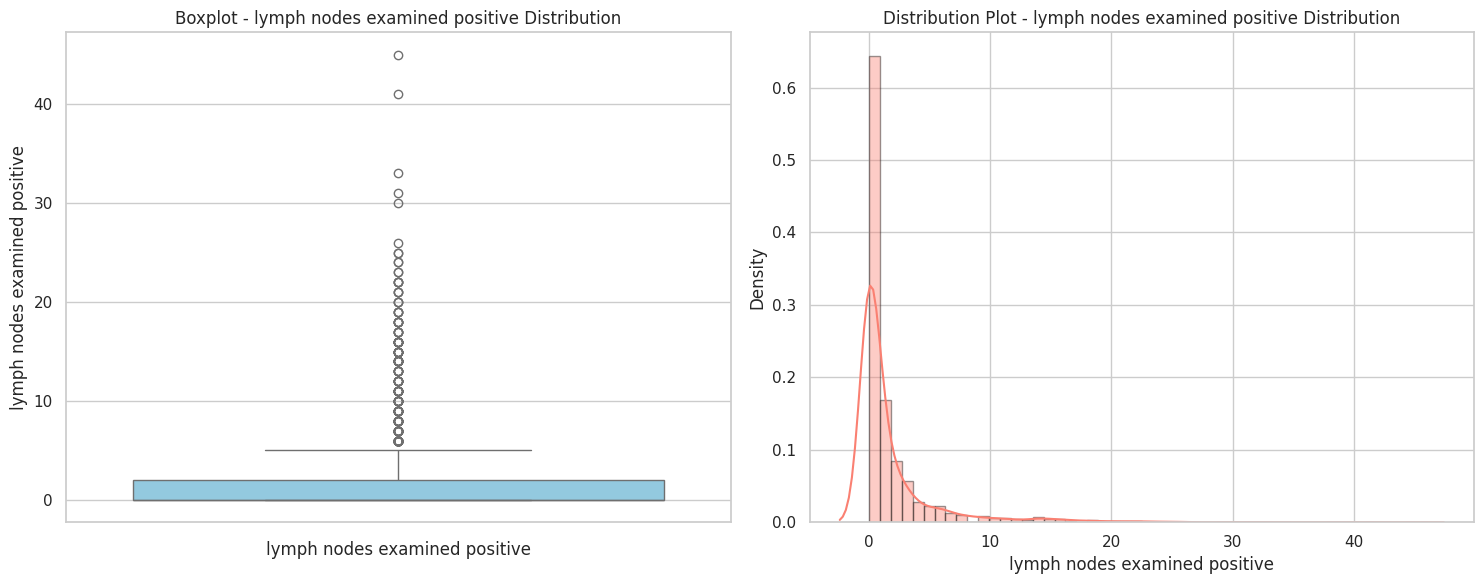

In [ ]:
analyze_distribution(df, 'lymph nodes examined positive')

>*The distribution of the variable "lymph nodes examined positive" is skewed to the right, indicating that the majority of values are concentrated on the lower end of the scale. Additionally, there are 239 outlier values present in the data. The average number of lymph nodes examined positive is 1.76, with the highest recorded value being 45.*

Checking value distribution for column 'mutation count':

Summary Statistics for 'mutation count':
count    2488.000000
mean        5.553055
std         3.875370
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        81.000000
Name: mutation count, dtype: float64

Number of outlier values: 75

The distribution is right-skewed.


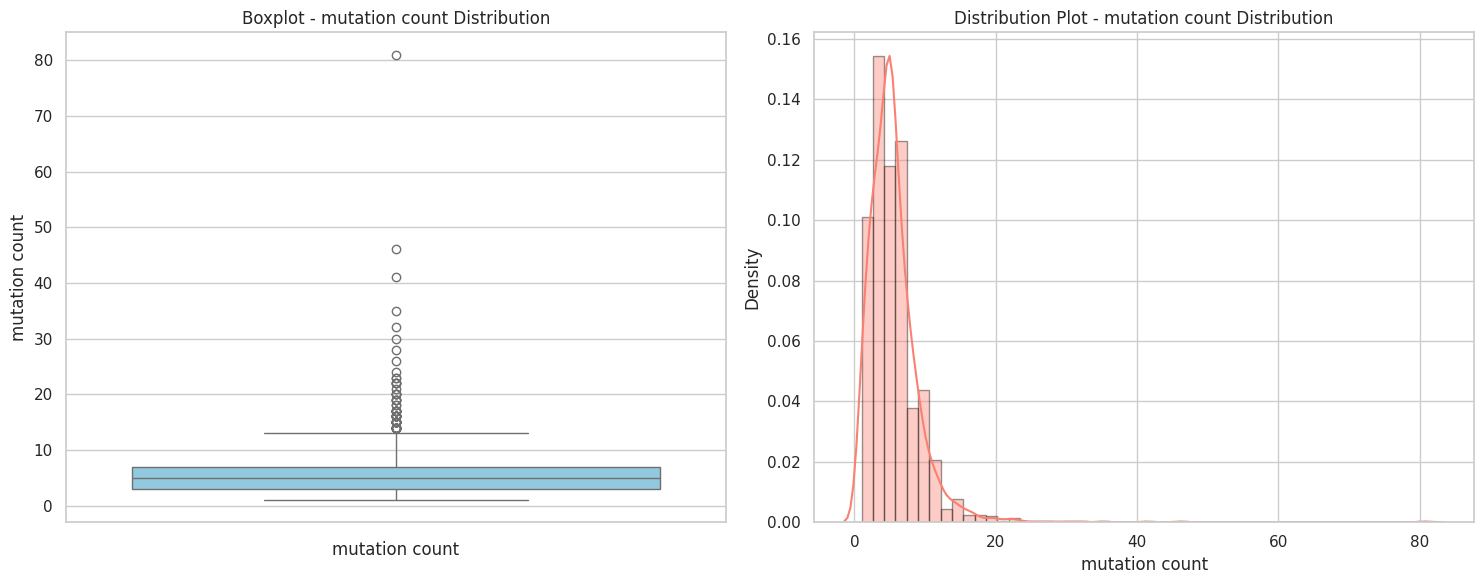

In [ ]:
analyze_distribution(df, 'mutation count')

>*For mutation count, the distribution is right-skewed with an average value of 5.55, a minimum value of 1 and a maximum value of 81. This implies that the majority of observations have lower mutation counts, while relatively few have higher mutation counts. The presence of 75 outlier values suggests that there are a considerable number of observations that significantly deviate from the typical pattern of mutation counts. These outliers represent extreme cases.*

Checking value distribution for column 'nottingham prognostic index':

Summary Statistics for 'nottingham prognostic index':
count    2488.000000
mean        4.027368
std         1.137951
min         1.000000
25%         3.052000
50%         4.040000
75%         5.036000
max         7.200000
Name: nottingham prognostic index, dtype: float64

Number of outlier values: 0

The distribution is left-skewed.


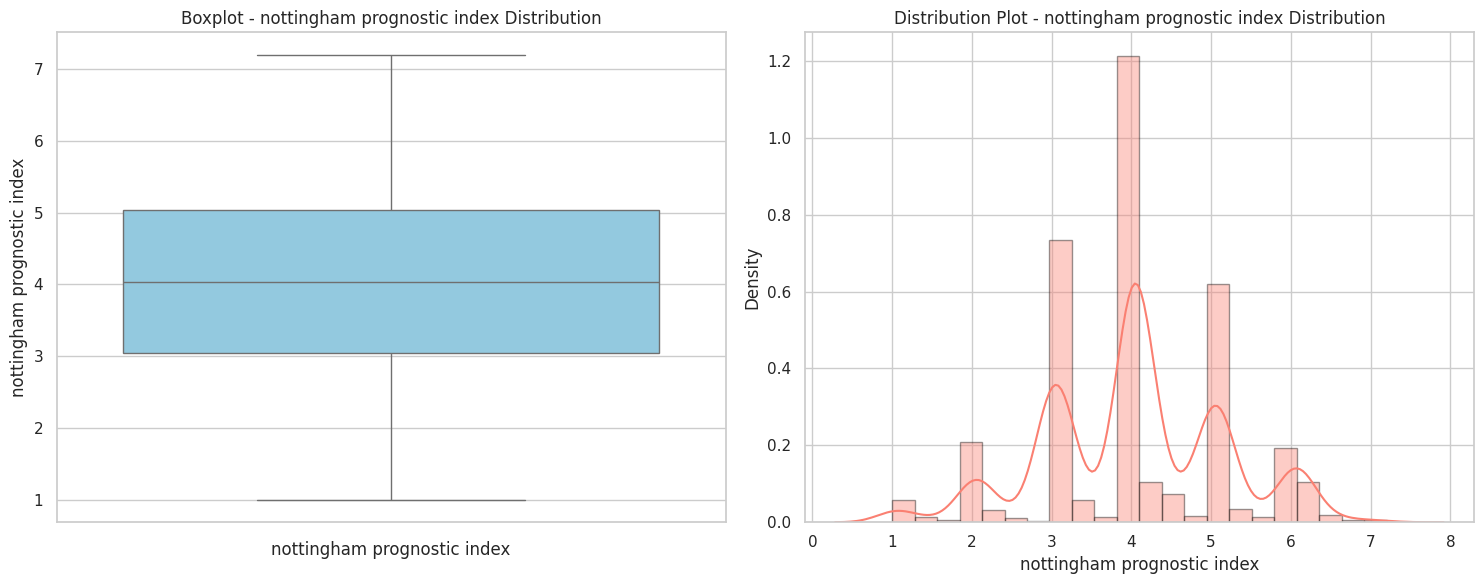

In [ ]:
analyze_distribution(df, 'nottingham prognostic index')

>*The nottingham prognostic index is left-skewed although is appears to normally distributed, which means it has a symmetrical shape around the mean.The average value recorded is 4.02, minimum value is 1 and maximum value is 7.2. The absence of outliers implies that there are no extreme or unusual values that significantly deviate from the typical pattern of NPI values.*

Checking value distribution for column 'tmb (nonsynonymous)':

Summary Statistics for 'tmb (nonsynonymous)':
count    2488.000000
mean        6.846600
std         5.327415
min         0.000000
25%         3.922553
50%         6.537589
75%         9.152624
max       104.601416
Name: tmb (nonsynonymous), dtype: float64

Number of outlier values: 75

The distribution is right-skewed.


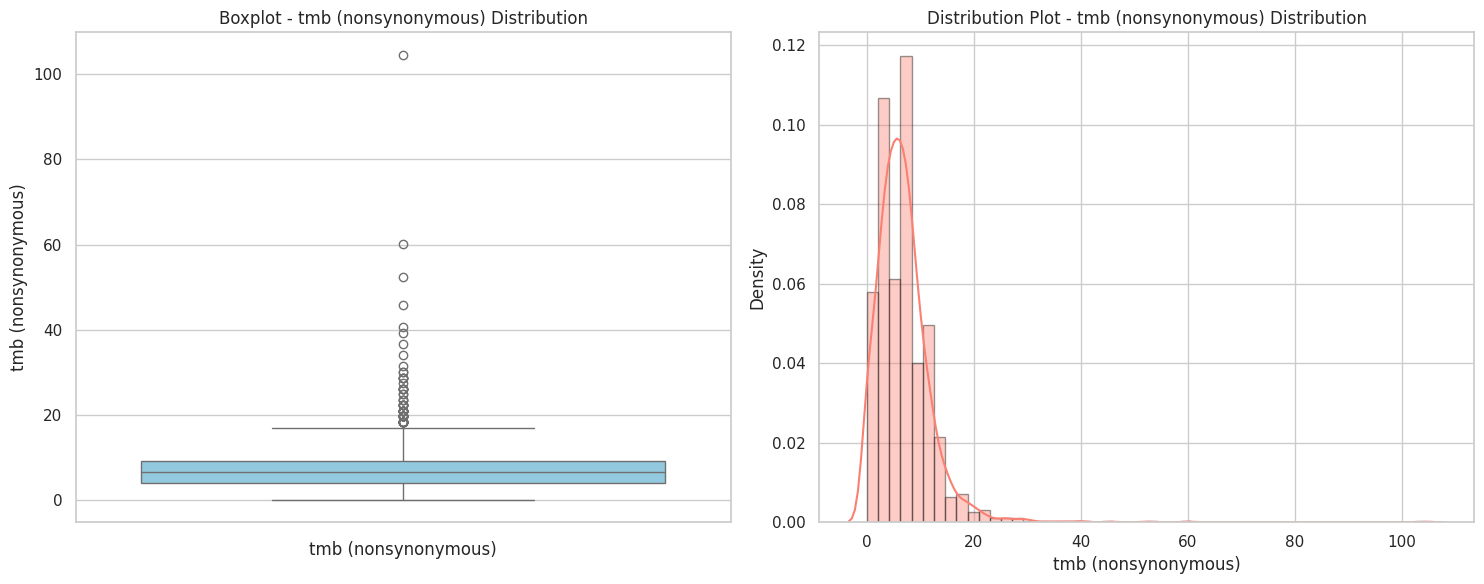

In [ ]:
analyze_distribution(df, 'tmb (nonsynonymous)')

>*The "tmb (nonsynonymous)" column displays a right-skewed distribution, with an average non-synonymous mutation burden (TMB) of approximately 6.85 mutations per megabase pair. The data exhibits variability, as indicated by a standard deviation of approximately 5.33. Quartile analysis reveals that 25% of the samples have TMB values below 3.92, while 75% have values below 9.15. Outliers, totaling 75, are present in the dataset, suggesting the existence of values significantly deviating from the typical range. Overall, the distribution implies a predominance of lower TMB values, with a small number of samples exhibiting higher TMB values.*

Checking value distribution for column 'tumor size':

Summary Statistics for 'tumor size':
count    2488.000000
mean       26.004823
std        14.914442
min         1.000000
25%        18.000000
50%        22.410000
75%        30.000000
max       182.000000
Name: tumor size, dtype: float64

Number of outlier values: 187

The distribution is right-skewed.


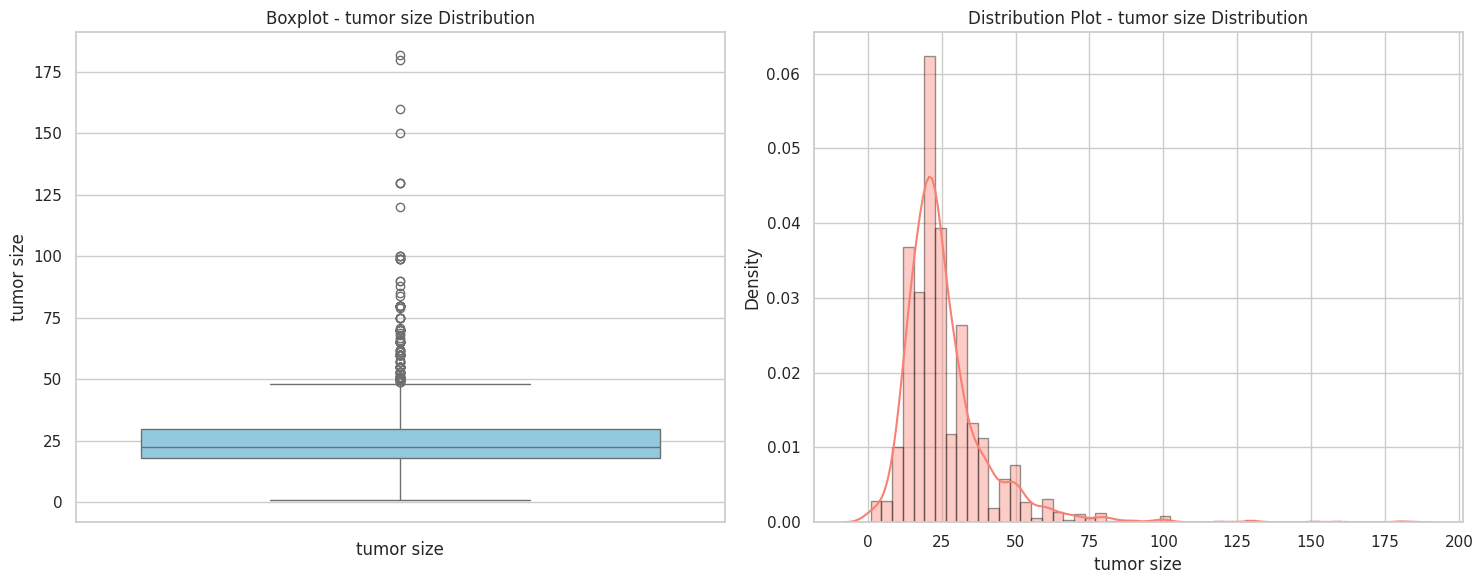

In [ ]:
analyze_distribution(df, 'tumor size')

>*The "tumor size" column exhibits a right-skewed distribution, with an average tumor size of approximately 26.00 millimeters. The dataset displays variability, with a standard deviation of approximately 14.91. Quartile analysis indicates that 25% of the samples have tumor sizes below 18.00 millimeters, while 75% have sizes below 30.00 millimeters. Outliers, totaling 187, are present in the dataset, suggesting the existence of values significantly deviating from the typical range. Overall, the distribution suggests a predominance of smaller tumor sizes, with a few samples exhibiting larger sizes.*

**Bivariate Analysis: Analysing the Relationship of Specified Numerical Variables with Cancer Relapse**

In [ ]:
def analyze_variable_vs_cancer_relapse(df, variable_name):
    """
    Analyze and visualize the relationship between a numerical variable and cancer relapse.

    Parameters:
    - df: DataFrame
    - variable_name: str, the name of the variable to analyze

    Returns:
    - None
    """
    # Print statement indicating the analysis
    print(f"Analyzing {variable_name} vs. Cancer Relapse:")

    # Plotting variable vs. Cancer Relapse
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Subplot 1: Boxplot
    plt.subplot(1, 3, 1)
    sns.boxplot(x=df['relapse free status'], y=df[variable_name], palette='coolwarm')
    plt.title(f'Boxplot - {variable_name} vs. cancer relapse')
    plt.xlabel('Cancer Relapse (0: No, 1: Yes)')
    plt.ylabel(f'{variable_name}')
    plt.xticks(rotation=90)

    # Subplot 2: Scatterplot
    plt.subplot(1, 3, 2)
    sns.scatterplot(x=df['relapse free status'], y=df[variable_name], color='skyblue')
    plt.title(f'Scatterplot - {variable_name} vs. cancer relapse')
    plt.xlabel('Cancer Relapse (0: No , 1: Yes)')
    plt.ylabel(f'{variable_name}')
    plt.xticks(rotation=90)

    # Subplot 3: Violinplot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df['relapse free status'], y=df[variable_name], palette='pastel')
    plt.title(f'Violinplot - {variable_name} vs. cancer relapse')
    plt.xlabel('Cancer Relapse (0: No, 1: Yes)')
    plt.ylabel(f'{variable_name}')
    plt.xticks(rotation=90)

    # Additional print statements
    print(f"\nSummary Statistics for '{variable_name}':")
    print(df[variable_name].describe())

    # Show the plots
    plt.tight_layout()
    plt.show()

Analyzing age at diagnosis vs. Cancer Relapse:

Summary Statistics for 'age at diagnosis':
count    2488.000000
mean       60.442673
std        13.044048
min        21.930000
25%        50.920000
50%        61.130000
75%        70.025000
max        96.290000
Name: age at diagnosis, dtype: float64


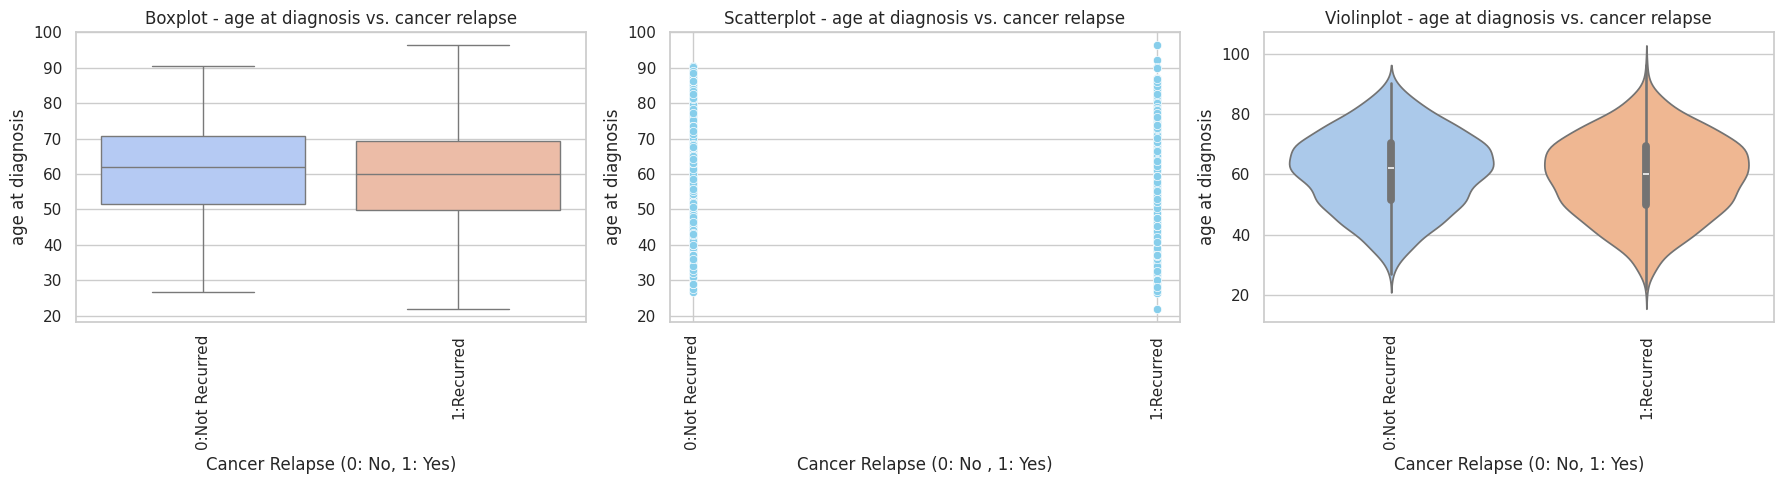

In [ ]:
analyze_variable_vs_cancer_relapse(df, 'age at diagnosis')

>*The chart illustrates that the age of diagnosis values follows a distribution with a standard deviation of 13.04, centered around 61. For cancer patients who experience a relapse, the median age of diagnosis is 60, suggesting minimal variance in classification. Consequently, the boxplot fails to differentiate between patients who experienced a relapse and those who did not, implying that the age of diagnosis may not serve as a reliable predictor for cancer relapse.*

Analyzing lymph nodes examined positive vs. Cancer Relapse:

Summary Statistics for 'lymph nodes examined positive':
count    2488.000000
mean        1.756029
std         3.858000
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        45.000000
Name: lymph nodes examined positive, dtype: float64


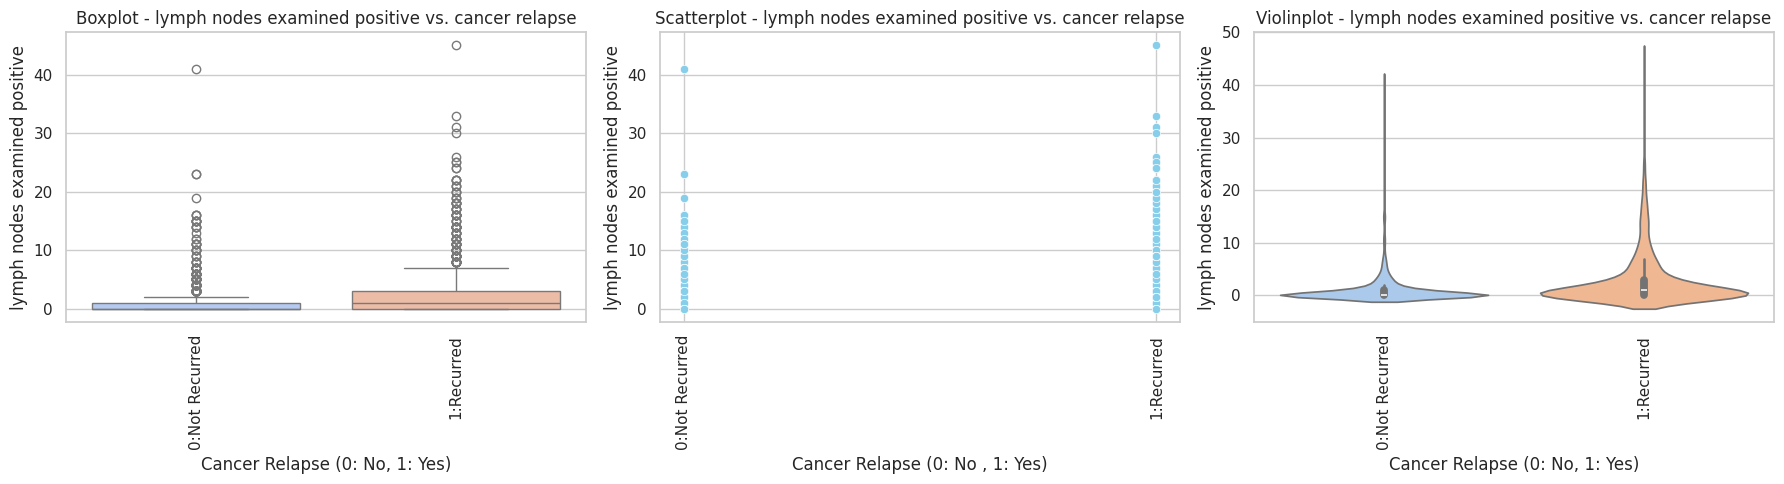

In [ ]:
analyze_variable_vs_cancer_relapse(df, 'lymph nodes examined positive')

>*From the visualization above, it was observed that the distribution of 'lymph nodes examined positive' does not effectively differentiate or segregate the cancer relapse labels. In other words, when examining the number of positive lymph nodes examined in relation to cancer relapse, there is no clear pattern or significant distinction between those who experienced a relapse and those who did not. This suggests that the variable may not be particularly useful or informative in predicting cancer relapse based on the available data.*

>*Additionally, from the summary statistics, it can be noted that the standard deviation is 3.85, indicating a relatively small spread of data around the mean, which is centered around 0. Furthermore, the median number of positive lymph nodes examined for those who experienced a relapse is barely above 0, implying that a large proportion of patients who had a relapse had very few or no positive lymph nodes examined.*

Analyzing mutation count vs. Cancer Relapse:

Summary Statistics for 'mutation count':
count    2488.000000
mean        5.553055
std         3.875370
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        81.000000
Name: mutation count, dtype: float64


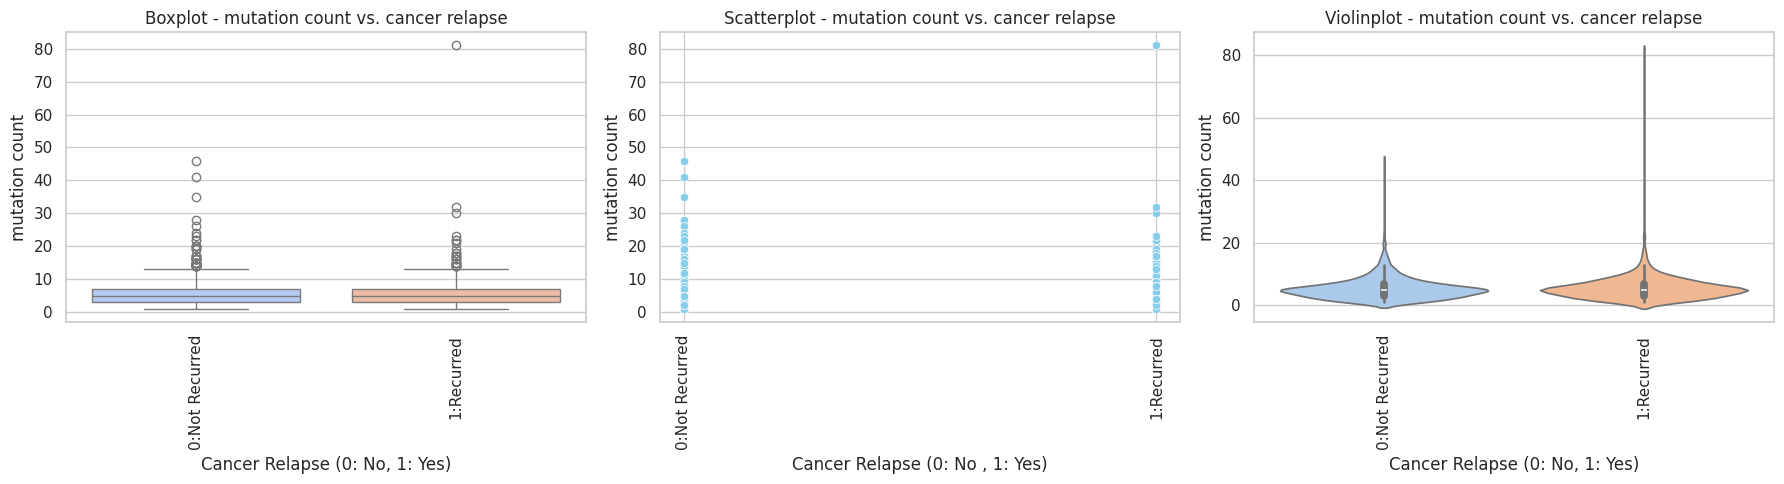

In [ ]:
analyze_variable_vs_cancer_relapse(df, 'mutation count')

>*As seen in the boxplot visual above, mutation count does not appear to determine cancer relapse. All of the variables examined will be further confirmed during the process of feature selection using relevant statistical methods.*

Analyzing nottingham prognostic index vs. Cancer Relapse:

Summary Statistics for 'nottingham prognostic index':
count    2488.000000
mean        4.027368
std         1.137951
min         1.000000
25%         3.052000
50%         4.040000
75%         5.036000
max         7.200000
Name: nottingham prognostic index, dtype: float64


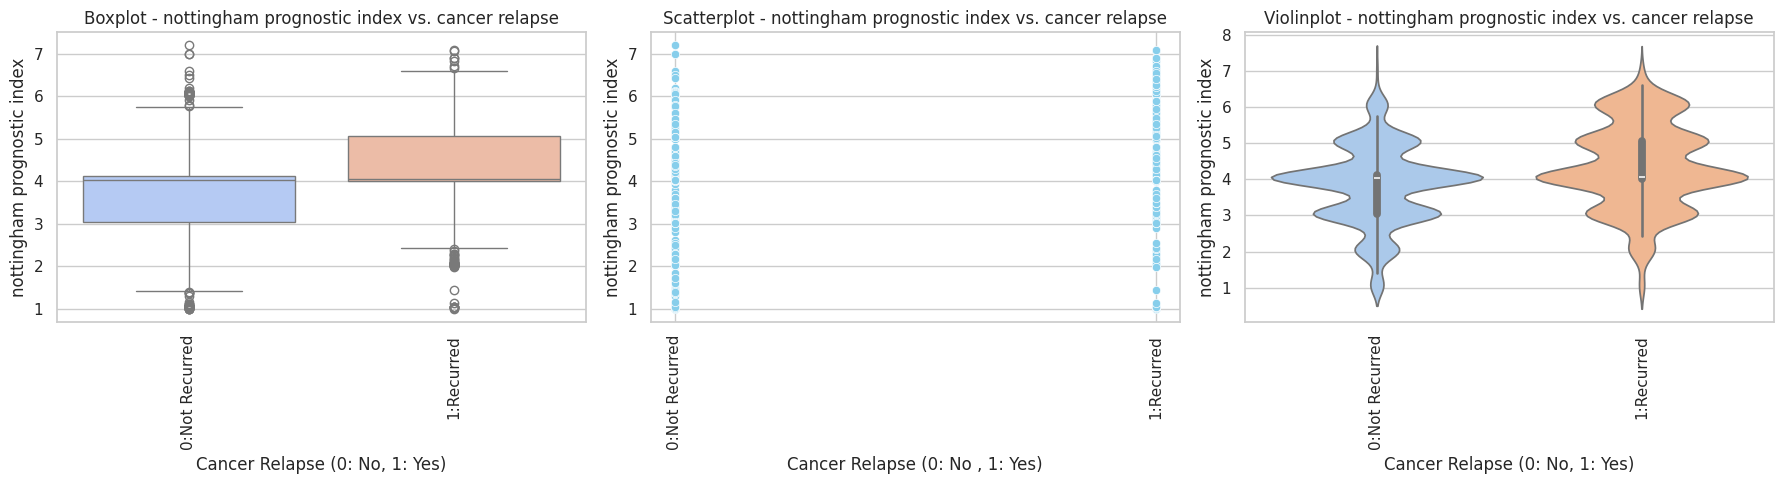

In [ ]:
analyze_variable_vs_cancer_relapse(df, 'nottingham prognostic index')

>*The chart distinctly shows a separation in the nottingham prognostic index between patients who experience cancer relapse and those who don't. Most patients who experiences a relapse have an index value between 4 & 5, while most of those who didn't experience a relapse have index values between 3 & 4.This predictor appears promising for accurately classifying whether a patient will experience a relapse or not.*

Analyzing tumor size vs. Cancer Relapse:

Summary Statistics for 'tumor size':
count    2488.000000
mean       26.004823
std        14.914442
min         1.000000
25%        18.000000
50%        22.410000
75%        30.000000
max       182.000000
Name: tumor size, dtype: float64


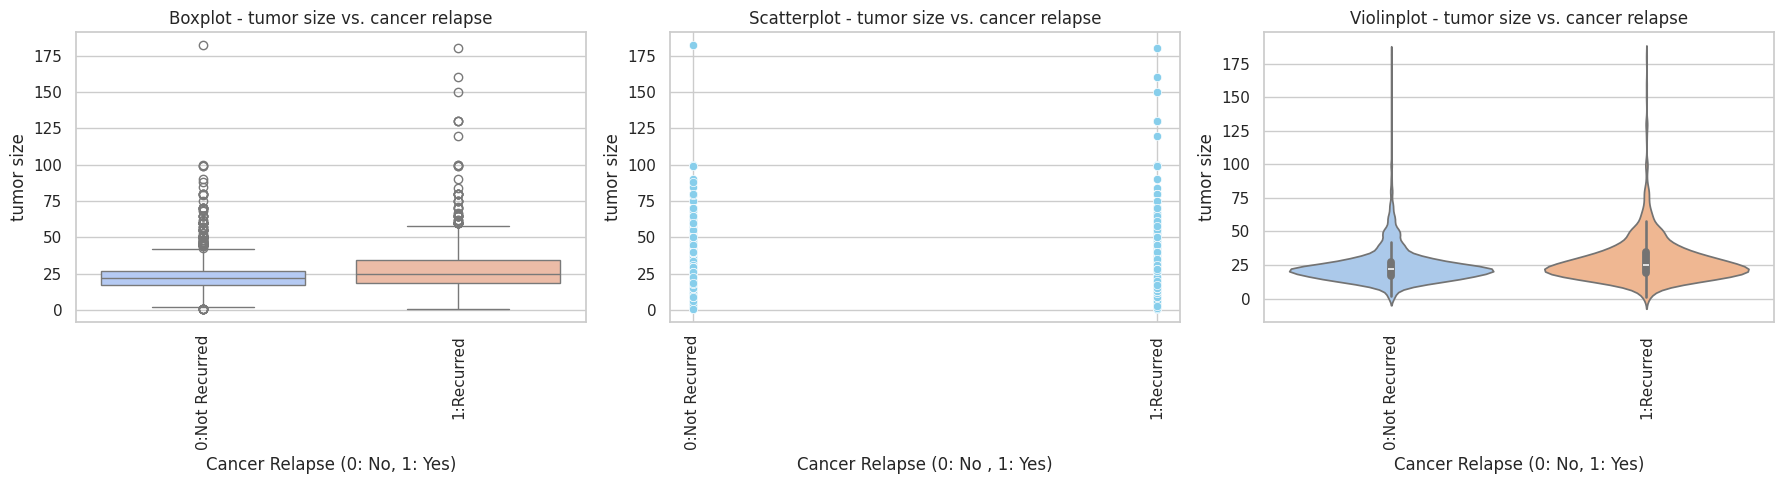

In [ ]:
analyze_variable_vs_cancer_relapse(df, 'tumor size')

>*From the chart above, we observe a slight degree of separation in how tumor size distinguishes between patients who experience a relapse and those who do not. Tumor size exhibits a distribution with a standard deviation of 14.91, centered around 22.41. The median tumor size for patients with cancer relapse is approximately 25, suggesting a slightly stronger association with cancer relapse.*

**Data Preprocessing**

The first preprocessing step utilizes LabelEncoder to encode the values in the columns 'cancer type detailed' and 'er status measured by ihc'.

For the second preprocessing step, one-hot encoding is applied to 'er status', 'tumor other histologic subtype', and 'oncotree code', with the first category of each encoded feature dropped. Subsequently, an iteration through each column in the resulting DataFrame is conducted, replacing boolean values (False and True) with integers (0 and 1) respectively.

Finally, the numeric values (0 and 1) within the target variables are extracted to create the target labels.

In [ ]:
# Round up the floating-point numbers in the 'age at diagnosis' column
df['age at diagnosis'] = df['age at diagnosis'].round().astype(int)

In [ ]:
def encode_and_print(df, column_name):
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

    # Fit and transform the specified column
    df[column_name] = label_encoder.fit_transform(df[column_name])

    # Map encoded values to original values
    encoded_values = label_encoder.transform(label_encoder.classes_)
    original_values = label_encoder.classes_

    # Print encoded values and their original mappings
    print(f"Encoded Values and Original Mappings for {column_name}:")
    for encoded, original in zip(encoded_values, original_values):
        print(f"Encoded Value: {encoded} -> Original Value: {original}")

In [ ]:
# Apply the function to 'cancer type detailed'
encode_and_print(df, 'cancer type detailed')

Encoded Values and Original Mappings for cancer type detailed:
Encoded Value: 0 -> Original Value: Breast
Encoded Value: 1 -> Original Value: Breast Angiosarcoma
Encoded Value: 2 -> Original Value: Breast Invasive Ductal Carcinoma
Encoded Value: 3 -> Original Value: Breast Invasive Lobular Carcinoma
Encoded Value: 4 -> Original Value: Breast Invasive Mixed Mucinous Carcinoma
Encoded Value: 5 -> Original Value: Breast Mixed Ductal and Lobular Carcinoma
Encoded Value: 6 -> Original Value: Invasive Breast Carcinoma
Encoded Value: 7 -> Original Value: Metaplastic Breast Cancer


In [ ]:
# Apply the function to 'er status measured by ihc'
encode_and_print(df, 'er status measured by ihc')

Encoded Values and Original Mappings for er status measured by ihc:
Encoded Value: 0 -> Original Value: Negative
Encoded Value: 1 -> Original Value: Positve


In [ ]:
# Specify columns to encode'er status', 'tumor other histologic subtype', 'oncotree code'
columns_to_encode = ['er status', 'tumor other histologic subtype', 'oncotree code']

# Perform one-hot encoding on specified columns
encoded_df = pd.get_dummies(df, columns=columns_to_encode, drop_first = True)

# Loop through each column in the DataFrame
for column in encoded_df.columns:
    # Replace False with 0 and True with 1
    encoded_df[column] = encoded_df[column].replace({False: 0, True: 1})

In [ ]:
# Extract numeric values from 'relapse free status' column
encoded_df['relapse free status'] = encoded_df['relapse free status'].str.extract('(\d)')

# Convert extracted values to integers
encoded_df['relapse free status'] = encoded_df['relapse free status'].astype(int)

In [ ]:
# Get the index of 'relapse free status' column
relapse_index = encoded_df.columns.get_loc('relapse free status')

# Rearrange the DataFrame columns
columns = list(encoded_df.columns)
columns.append(columns.pop(relapse_index))

# Reassign the DataFrame with the rearranged columns
encoded_df = encoded_df[columns]

# Replace spaces with underscores and convert column names to lowercase
encoded_df.columns = encoded_df.columns.str.replace(' ', '_').str.lower()

In [ ]:
encoded_df.head()

,age_at_diagnosis,cancer_type_detailed,cohort,er_status_measured_by_ihc,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,tmb_(nonsynonymous),tumor_size,er_status_positive,tumor_other_histologic_subtype_lobular,tumor_other_histologic_subtype_medullary,tumor_other_histologic_subtype_metaplastic,tumor_other_histologic_subtype_mixed,tumor_other_histologic_subtype_mucinous,tumor_other_histologic_subtype_other,tumor_other_histologic_subtype_tubular/_cribriform,oncotree_code_breast,oncotree_code_idc,oncotree_code_ilc,oncotree_code_immc,oncotree_code_mbc,oncotree_code_mdlc,oncotree_code_pbs,relapse_free_status
0,76,2,1.0,1,3.0,10.0,5.0,6.044,0.000000,22.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,43,2,1.0,1,3.0,0.0,2.0,4.020,2.615035,10.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,49,2,1.0,1,2.0,1.0,2.0,4.030,2.615035,15.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,48,5,1.0,1,2.0,3.0,1.0,4.050,1.307518,25.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,77,5,1.0,1,3.0,8.0,2.0,6.080,2.615035,40.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


**Utilizing Recursive Feature Elimination for Feature Selection**

Recursive Feature Elimination (RFE) is a technique aimed at iteratively eliminating less significant features from the dataset. Its significance lies in augmenting model generalization, refining interpretability, alleviating the curse of dimensionality, optimizing computational resources, and curbing overfitting. By implementing RFE on the training set, as undertaken in this study, it facilitates the development of a more precise, streamlined, and interpretable model that focuses on the most informative features, thereby enhancing performance on unseen data.

In [ ]:
# Separate predictors and target variable
X = encoded_df.drop(['relapse_free_status'], axis=1)
y = encoded_df['relapse_free_status']

# Number of features before feature selection
num_features_before = X.shape[1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression model (you can replace it with other models)
model = LogisticRegression()

# Initialize RFE with the logistic regression model
rfe = RFE(model)

# Create parameter grid for the number of features to select
param_grid = {'n_features_to_select': list(range(1, X.shape[1] + 1))}

# Perform cross-validated grid search
grid_search = GridSearchCV(rfe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best number of features
best_num_features = grid_search.best_params_['n_features_to_select']

# Print the best number of features
print(f"Best number of features: {best_num_features}")

# Get the selected features using the best number
rfe = RFE(model, n_features_to_select=best_num_features)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]

# Print the selected features
print("\nSelected Features:")
print(selected_features)

# Train a model using the selected features
model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Number of features before feature selection: {num_features_before}")
print(f"Accuracy on the test set: {accuracy:.2%}")

Best number of features: 20

Selected Features:
Index(['cancer_type_detailed', 'neoplasm_histologic_grade',
       'lymph_nodes_examined_positive', 'nottingham_prognostic_index',
       'tmb_(nonsynonymous)', 'er_status_positive',
       'tumor_other_histologic_subtype_lobular',
       'tumor_other_histologic_subtype_medullary',
       'tumor_other_histologic_subtype_metaplastic',
       'tumor_other_histologic_subtype_mixed',
       'tumor_other_histologic_subtype_mucinous',
       'tumor_other_histologic_subtype_other',
       'tumor_other_histologic_subtype_tubular/_cribriform',
       'oncotree_code_breast', 'oncotree_code_idc', 'oncotree_code_ilc',
       'oncotree_code_immc', 'oncotree_code_mbc', 'oncotree_code_mdlc',
       'oncotree_code_pbs'],
      dtype='object')
Number of features before feature selection: 25
Accuracy on the test set: 66.40%


>*Based on RFE, only 20 features will be used for modelling. The chosen features are highlighted above.*

In [ ]:
# using the selected features only
X_train = X_train[selected_features]
X_test = X_test[selected_features]

**Evaluation Metrics Definition**

A brief explanation of each evaluation metric for the multiclass classification problem is given below:

**Accuracy:** It measures the proportion of correctly classified instances among all instances. It's calculated as the ratio of the number of correct predictions to the total number of predictions.

**Precision:** It measures the proportion of true positive predictions among all positive predictions. It's calculated as the ratio of true positives to the sum of true positives and false positives.

**Recall:** Also known as sensitivity or true positive rate, it measures the proportion of true positive predictions among all actual positives. It's calculated as the ratio of true positives to the sum of true positives and false negatives.

**F1 Score:** It is the harmonic mean of precision and recall, providing a balance between the two metrics. It's calculated as 2 * (precision * recall) / (precision + recall). It is particularly useful when you want to seek a balance between precision and recall.

In [ ]:
def round_values(values):
    """Round a list of values to 4 decimal places."""
    return [round(value, 4) for value in values]

def print_model_results(train_accuracy, train_precision, train_recall, train_f1_score,
                        test_accuracy, test_precision, test_recall, test_f1_score,
                        model_name=""):
    """Print the model results in a table."""
    # Define the results as a list of lists
    results = [
        ["Training Set", model_name, *round_values([train_accuracy, train_precision, train_recall, train_f1_score])],
        ["Test Set", model_name, *round_values([test_accuracy, test_precision, test_recall, test_f1_score])]
    ]

    # Define the column headers
    headers = ["Dataset", "Model Name", "Accuracy", "Precision", "Recall", "F1-score"]

    # Print the table
    print(tabulate(results, headers=headers, tablefmt="pretty"))

**Model Training**

**1. Logistic Regression (LR)**


Logistic regression is a statistical method used for binary classification tasks, predicting the probability of a binary outcome based on input features. It models the relationship between features and the probability of the outcome using the logistic function. Logistic regression provides interpretable coefficients for input features and is efficient for binary classification with low computational cost. It outputs probabilities, making it useful for understanding prediction certainty, and is less prone to overfitting with limited training data. It is simple, interpretable, and widely used for binary classification tasks.

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # L1 and L2 regularization
    'C': uniform(loc=0, scale=4),  # Regularization strength (uniform distribution between 0 and 4)
    'solver': ['liblinear', 'saga'],  # Optimization algorithms
    'class_weight': ['balanced', None],  # Handling class imbalance
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}


# Create a Logistic Regression model
lr = LogisticRegression()

# Create RandomizedSearchCV object
lr_random_search = RandomizedSearchCV(lr, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model to the data
lr_random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Logistic Regression: ", lr_random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Logistic Regression:  {'C': 3.4647045830997407, 'class_weight': None, 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}


In [ ]:
# Extract the best model from the search results
best_lr_model = lr_random_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy_lr = best_lr_model.score(X_train, y_train)
train_predictions_lr = best_lr_model.predict(X_train)
train_precision_lr, train_recall_lr, train_f1_score_lr, _ = precision_recall_fscore_support(y_train, train_predictions_lr, average='weighted')

# Evaluate the best model on the test set
test_accuracy_lr = best_lr_model.score(X_test, y_test)
test_predictions_lr = best_lr_model.predict(X_test)
test_precision_lr, test_recall_lr, test_f1_score_lr, _ = precision_recall_fscore_support(y_test, test_predictions_lr, average='weighted')

# Print the model results
print_model_results(train_accuracy_lr, train_precision_lr, train_recall_lr, train_f1_score_lr,
                    test_accuracy_lr, test_precision_lr, test_recall_lr, test_f1_score_lr,
                    model_name="Logistic Regression")

+--------------+---------------------+----------+-----------+--------+----------+
|   Dataset    |     Model Name      | Accuracy | Precision | Recall | F1-score |
+--------------+---------------------+----------+-----------+--------+----------+
| Training Set | Logistic Regression |  0.6445  |  0.6496   | 0.6445 |  0.5998  |
|   Test Set   | Logistic Regression |  0.6613  |  0.6541   | 0.6613 |  0.6246  |
+--------------+---------------------+----------+-----------+--------+----------+


>*The result of the logistics regression model shows an accuracy of 64.45%, precision of 64.96%, recall of 64.45% and f1 score of 59.98% on the training set and on the test set, the model achieves an accuracy of 66.13%, precision of 65.41%, recall of 66.13% and f1 score of 62.476%.*

**2. Linear Discriminant Analysis (LDA)**


Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction and classification technique. It works by finding linear combinations of features that best separate multiple classes or categories in the data. LDA calculates the mean vectors and scatter matrices for each class, then projects the data onto a lower-dimensional subspace while maximizing the ratio of between-class scatter to within-class scatter. Advantages of LDA include dimensionality reduction, optimal linear separation, statistical soundness, and reduced overfitting. Overall, LDA is a powerful and widely used method for dimensionality reduction and classification tasks, especially when the classes are well-separated and the assumptions of the method are met.

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],  # Solvers for LDA
    'shrinkage': ['auto', None],  # Shrinkage parameter
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}

# Create an LDA model
lda = LinearDiscriminantAnalysis()

# Create RandomizedSearchCV object
lda_random_search = RandomizedSearchCV(lda, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model to the data
lda_random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Linear Discriminant Analysis: ", lda_random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Linear Discriminant Analysis:  {'tol': 0.0001, 'solver': 'lsqr', 'shrinkage': None}


In [ ]:
# Extract the best model from the search results
best_lda_model = lda_random_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy_lda = best_lda_model.score(X_train, y_train)
train_predictions_lda = best_lda_model.predict(X_train)
train_precision_lda, train_recall_lda, train_f1_score_lda, _ = precision_recall_fscore_support(y_train, train_predictions_lda, average='weighted')

# Evaluate the best model on the test set
test_accuracy_lda = best_lda_model.score(X_test, y_test)
test_predictions_lda = best_lda_model.predict(X_test)
test_precision_lda, test_recall_lda, test_f1_score_lda, _ = precision_recall_fscore_support(y_test, test_predictions_lda, average='weighted')

# Print the model results
print_model_results(train_accuracy_lda, train_precision_lda, train_recall_lda, train_f1_score_lda,
                    test_accuracy_lda, test_precision_lda, test_recall_lda, test_f1_score_lda,
                    model_name="Linear Discriminant Analysis")

+--------------+------------------------------+----------+-----------+--------+----------+
|   Dataset    |          Model Name          | Accuracy | Precision | Recall | F1-score |
+--------------+------------------------------+----------+-----------+--------+----------+
| Training Set | Linear Discriminant Analysis |  0.6439  |  0.6503   | 0.6439 |  0.5974  |
|   Test Set   | Linear Discriminant Analysis |  0.664   |  0.6584   | 0.664  |  0.6267  |
+--------------+------------------------------+----------+-----------+--------+----------+


>*While the outcomes of LDA closely resemble those of the Logistic Regression model, LDA demonstrates a slightly superior performance in terms of accuracy and F1 score, particularly when considering the results from the test set. For the training set, LDA achieved an accuracy of 64.39%, with precision, recall, and F1 scores of 65.03%, 64.39%, and 59.74%, respectively on the training set. On the test set, LDA exhibited an accuracy of 66.4%, accompanied by precision, recall, and F1 scores of 65.84%, 66.4%, and 62.67%, respectively.*

**3. Light Gradient Boosting Machine (LGBM)**

LightGBM is a gradient boosting framework for classification tasks that utilizes tree-based learning algorithms. It builds a series of decision trees iteratively to correct errors and minimize the overall loss function. LightGBM employs gradient boosting and leaf-wise growth strategies, along with histogram-based splitting, to accelerate training and reduce memory usage. Its advantages include speed, efficiency, high accuracy, support for parallel and GPU computing, and customizable parameters for optimization. LightGBM is a powerful and efficient algorithm for classification, offering scalability, accuracy, and flexibility.

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': uniform(loc=0, scale=0.1),  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5]  # L2 regularization term on weights
}

# Create an LGBM model
lgbm = LGBMClassifier()

# Create RandomizedSearchCV object
lgbm_random_search = RandomizedSearchCV(lgbm, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model to the data
lgbm_random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for LightGBM: ", lgbm_random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 713, number of negative: 1028
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 1741, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.409535 -> initscore=-0.365889
[LightGBM] [Info] Start training from score -0.365889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
# Extract the best model from the search results
best_lgbm_model = lgbm_random_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy_lgbm = best_lgbm_model.score(X_train, y_train)
train_predictions_lgbm = best_lgbm_model.predict(X_train)
train_precision_lgbm, train_recall_lgbm, train_f1_score_lgbm, _ = precision_recall_fscore_support(y_train, train_predictions_lgbm, average='weighted')

# Evaluate the best model on the test set
test_accuracy_lgbm = best_lgbm_model.score(X_test, y_test)
test_predictions_lgbm = best_lgbm_model.predict(X_test)
test_precision_lgbm, test_recall_lgbm, test_f1_score_lgbm, _ = precision_recall_fscore_support(y_test, test_predictions_lgbm, average='weighted')

# Print the model results
print_model_results(train_accuracy_lgbm, train_precision_lgbm, train_recall_lgbm, train_f1_score_lgbm,
                    test_accuracy_lgbm, test_precision_lgbm, test_recall_lgbm, test_f1_score_lgbm,
                    model_name="LightGBM")

+--------------+------------+----------+-----------+--------+----------+
|   Dataset    | Model Name | Accuracy | Precision | Recall | F1-score |
+--------------+------------+----------+-----------+--------+----------+
| Training Set |  LightGBM  |  0.6634  |  0.6725   | 0.6634 |  0.6269  |
|   Test Set   |  LightGBM  |  0.664   |  0.6556   | 0.664  |  0.6322  |
+--------------+------------+----------+-----------+--------+----------+


>*The result above shows that LightGBM has a slightly better performance than LDA and LR considering its test accuracy score of 66.4% and F1 score of 63.22%. The test precision and recall are 65.56% and 66.4% respectively. On the training sets, the accuracy, precision, recall and f1 score are 66.34%, 67.25%, 66.34% and 62.69% respectively*

**4. Gradient Boosting Machine (GBM)**


Gradient Boosting Machine (GBM) is a machine learning algorithm used for classification tasks. It works by sequentially building an ensemble of decision trees, where each tree corrects the errors made by the previous ones. GBM aims to minimize the loss function, which measures the difference between actual and predicted values. It yields high accuracy by combining multiple weak learners and is robust to overfitting due to regularization and cross-validation techniques. GBM provides insights into feature importance, handles various data types, and can handle missing data without preprocessing. Overall, GBM is a flexible and powerful algorithm suitable for a wide range of classification tasks.

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': uniform(loc=0, scale=0.1),  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create a GBM model
gbm = GradientBoostingClassifier()

# Create RandomizedSearchCV object
gbm_random_search = RandomizedSearchCV(gbm, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model to the data
gbm_random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Gradient Boosting Machine: ", gbm_random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Gradient Boosting Machine:  {'learning_rate': 0.03745401188473625, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
# Extract the best model from the search results
best_gbm_model = gbm_random_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy_gbm = best_gbm_model.score(X_train, y_train)
train_predictions_gbm = best_gbm_model.predict(X_train)
train_precision_gbm, train_recall_gbm, train_f1_score_gbm, _ = precision_recall_fscore_support(y_train, train_predictions_gbm, average='weighted')

# Evaluate the best model on the test set
test_accuracy_gbm = best_gbm_model.score(X_test, y_test)
test_predictions_gbm = best_gbm_model.predict(X_test)
test_precision_gbm, test_recall_gbm, test_f1_score_gbm, _ = precision_recall_fscore_support(y_test, test_predictions_gbm, average='weighted')

# Print the model results
print_model_results(train_accuracy_gbm, train_precision_gbm, train_recall_gbm, train_f1_score_gbm,
                    test_accuracy_gbm, test_precision_gbm, test_recall_gbm, test_f1_score_gbm,
                    model_name="Gradient Boosting Machine")

+--------------+---------------------------+----------+-----------+--------+----------+
|   Dataset    |        Model Name         | Accuracy | Precision | Recall | F1-score |
+--------------+---------------------------+----------+-----------+--------+----------+
| Training Set | Gradient Boosting Machine |  0.6577  |  0.6726   | 0.6577 |  0.613   |
|   Test Set   | Gradient Boosting Machine |  0.676   |  0.6769   | 0.676  |  0.6389  |
+--------------+---------------------------+----------+-----------+--------+----------+


>*The GBM model demonstrates slightly better performance compared to other models. Specifically, the training accuracy, precision, recall, and F1 score are 65.77%, 67.26%, 65.77%, and 61.3%, respectively. Similarly, for the test set, the accuracy, precision, recall, and F1 scores are 67.6%, 67.69%, 67.6% and 63.89%*

**5. Random Forest (RF)**


Random Forest is an ensemble learning method used for classification tasks. It builds multiple decision trees during training, where each tree is trained on a random subset of the training data and features. During prediction, each tree in the forest makes a classification decision, and the final prediction is determined by a majority vote.

Advantages of Random Forest include high accuracy, robustness to overfitting, feature importance insights, ability to handle missing values, and efficiency in handling large and high-dimensional datasets.

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create a Random Forest model
rf = RandomForestClassifier()

# Create RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model to the data
rf_random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for Random Forest: ", rf_random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}


In [ ]:
# Extract the best model from the search results
best_rf_model = rf_random_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy_rf = best_rf_model.score(X_train, y_train)
train_predictions_rf = best_rf_model.predict(X_train)
train_precision_rf, train_recall_rf, train_f1_score_rf, _ = precision_recall_fscore_support(y_train, train_predictions_rf, average='weighted')

# Evaluate the best model on the test set
test_accuracy_rf = best_rf_model.score(X_test, y_test)
test_predictions_rf = best_rf_model.predict(X_test)
test_precision_rf, test_recall_rf, test_f1_score_rf, _ = precision_recall_fscore_support(y_test, test_predictions_rf, average='weighted')

# Print the model results
print_model_results(train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_score_rf,
                    test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_score_rf,
                    model_name="Random Forest")

+--------------+---------------+----------+-----------+--------+----------+
|   Dataset    |  Model Name   | Accuracy | Precision | Recall | F1-score |
+--------------+---------------+----------+-----------+--------+----------+
| Training Set | Random Forest |  0.6623  |  0.6878   | 0.6623 |  0.6131  |
|   Test Set   | Random Forest |  0.6734  |  0.6751   | 0.6734 |  0.6335  |
+--------------+---------------+----------+-----------+--------+----------+


>*The result above shows that RF has training accuracy of 66.23%, Precision of 68.78%, recall of 66.23% and f1 score of 61.31%; test accuracy of 67.34%, precision of 67.51%, recall of 67.34%, f1 score of 63.35%. In comparison with the other models, RF has a slightly better performance than LGBM and the other models asides Extreme Gradient Boosting and Gradient Boosting Machine.*

**6. Extreme Gradient Boosting (XGBoost)**



XGBoost is an ensemble learning algorithm that uses gradient boosting to sequentially train decision trees to correct errors made by previous models. It optimizes a user-defined objective function by minimizing the loss function, typically logistic loss for binary classification or softmax for multi-class classification. It builds shallow decision trees as base learners and employs gradient descent optimization to update model parameters in each iteration. XGBoost provides regularization techniques such as L1 and L2 regularization, tree depth constraints, and subsampling to prevent overfitting. Pruning is used to remove unnecessary splits in trees, and predictions are made by combining the outputs of all trees. Overall, XGBoost is known for its scalability, speed, and performance in both competitions and real-world applications.

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
    'max_depth': [3, 5, 7],  # Maximum depth of trees
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5]  # L2 regularization term on weights
}

# Create an XGBoost model
xgb = XGBClassifier()

# Create RandomizedSearchCV object
xgb_random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model to the data
xgb_random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for XGBoost: ", xgb_random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for XGBoost:  {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [ ]:
# Extract the best model from the search results
best_xgb_model = xgb_random_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy_xgb = best_xgb_model.score(X_train, y_train)
train_predictions_xgb = best_xgb_model.predict(X_train)
train_precision_xgb, train_recall_xgb, train_f1_score_xgb, _ = precision_recall_fscore_support(y_train, train_predictions_xgb, average='weighted')

# Evaluate the best model on the test set
test_accuracy_xgb = best_xgb_model.score(X_test, y_test)
test_predictions_xgb = best_xgb_model.predict(X_test)
test_precision_xgb, test_recall_xgb, test_f1_score_xgb, _ = precision_recall_fscore_support(y_test, test_predictions_xgb, average='weighted')

# Print the model results
print_model_results(train_accuracy_xgb, train_precision_xgb, train_recall_xgb, train_f1_score_xgb,
                    test_accuracy_xgb, test_precision_xgb, test_recall_xgb, test_f1_score_xgb,
                    model_name="XGBoost")

+--------------+------------+----------+-----------+--------+----------+
|   Dataset    | Model Name | Accuracy | Precision | Recall | F1-score |
+--------------+------------+----------+-----------+--------+----------+
| Training Set |  XGBoost   |  0.6962  |  0.7388   | 0.6962 |  0.655   |
|   Test Set   |  XGBoost   |  0.6747  |  0.6784   | 0.6747 |  0.6337  |
+--------------+------------+----------+-----------+--------+----------+


>*The XGBoost model has training accuracy of 69.62%, precision of 73.88%, recall of 69.62% and f1 score of 65.5%. The test accuracy is 67.47%, precision 67.84%, recall of 67.47% and f1 score of 63.37%. In comparison with other models, XGBoost has the closest performance to GBM.*

>*The absence of overfitting observed across all the models used is a positive outcome. Overfitting occurs when a model learns to memorize the training data rather than generalize from it. This often results in high accuracy on the training data but poor performance on unseen data. In contrast, models that generalize well exhibit consistent performance across both training and testing datasets, indicating that they have captured underlying patterns in the data without being overly influenced by noise or outliers. This is advantageous as it suggests that the models have learned meaningful relationships and are likely to perform well on new, unseen data, making them reliable for real-world applications.*

**7. Artificial Neural Network (ANN)**


ANNs for tabular data classification consist of interconnected neurons arranged in layers. Input features are fed into the input layer, processed through hidden layers with activation functions introducing non-linearity, and outputted through the output layer, often using softmax for multi-class classification. During training, parameters are adjusted using optimization algorithms like gradient descent, with backpropagation used to compute gradients. ANNs excel at capturing complex patterns in data but require proper hyperparameter tuning and sufficient training data for optimal performance.

In [ ]:
# Define the function to create the ANN model
def create_model(optimizer='adam', activation='relu', neurons=100):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],  # Optimizer algorithm
    'activation': ['relu', 'sigmoid'],  # Activation function
    'neurons': [50, 100, 150]  # Number of neurons in the hidden layer
}

# Create a KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Create RandomizedSearchCV object
ann_random_search = RandomizedSearchCV(keras_classifier, param_distributions=param_grid, n_iter=5, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model to the data
ann_random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for ANN: ", ann_random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters for ANN:  {'optimizer': 'rmsprop', 'neurons': 50, 'activation': 'relu'}


In [ ]:
# Extract the best model from the search results
best_ann_model = ann_random_search.best_estimator_

# Evaluate the best model on the training set
train_accuracy_ann = best_ann_model.score(X_train, y_train)
train_predictions_ann = best_ann_model.predict(X_train)
train_precision_ann, train_recall_ann, train_f1_score_ann, _ = precision_recall_fscore_support(y_train, train_predictions_ann, average='weighted')

# Evaluate the best model on the test set
test_accuracy_ann = best_ann_model.score(X_test, y_test)
test_predictions_ann = best_ann_model.predict(X_test)
test_precision_ann, test_recall_ann, test_f1_score_ann, _ = precision_recall_fscore_support(y_test, test_predictions_ann, average='weighted')

# Print the model results
print_model_results(train_accuracy_ann, train_precision_ann, train_recall_ann, train_f1_score_ann,
                    test_accuracy_ann, test_precision_ann, test_recall_ann, test_f1_score_ann,
                    model_name="ANN")

24/24 [==============================] - 0s 2ms/step
+--------------+------------+----------+-----------+--------+----------+
|   Dataset    | Model Name | Accuracy | Precision | Recall | F1-score |
+--------------+------------+----------+-----------+--------+----------+
| Training Set |    ANN     |  0.6433  |  0.6627   | 0.6433 |  0.585   |
|   Test Set   |    ANN     |  0.6653  |  0.6635   | 0.6653 |  0.6236  |
+--------------+------------+----------+-----------+--------+----------+


>*The ANN model has an accuracy of 64.33%, Precision of 66.27%, Recall of 64.33% and F1 score of 58.5%. On the test set, it has an accuracy of 66.53%, precision of 66.35%, recall of 66.53% and f1 score of 62.36%. ANN's accuracy is slightly better than that of LR, LDA and LGBM but it has the lowest F1 score.*

**Comparative Analysis of Model Performance**

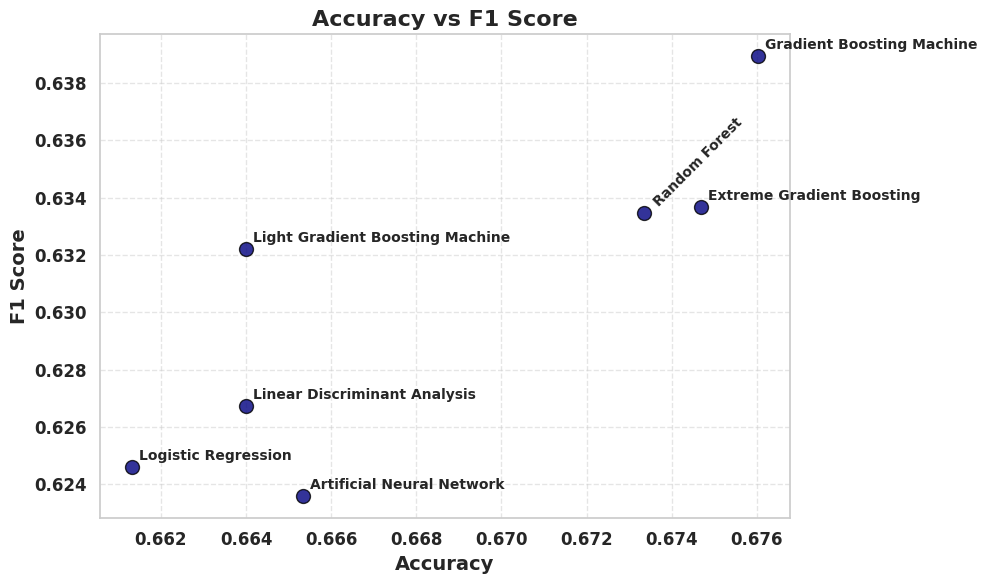

In [ ]:
# Define the model names
model_names = ["Logistic Regression", "Linear Discriminant Analysis", "Light Gradient Boosting Machine", "Gradient Boosting Machine", "Random Forest", "Extreme Gradient Boosting", "Artificial Neural Network"]

# Define the accuracy and F1 scores for each model
accuracy_scores = [test_accuracy_lr, test_accuracy_lda, test_accuracy_lgbm, test_accuracy_gbm, test_accuracy_rf, test_accuracy_xgb, test_accuracy_ann]
f1_scores = [test_f1_score_lr, test_f1_score_lda, test_f1_score_lgbm, test_f1_score_gbm,  test_f1_score_rf,  test_f1_score_xgb, test_f1_score_ann]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(accuracy_scores, f1_scores, color='navy', edgecolor='black', s=100, alpha=0.8)

# Add bold title and labels
plt.title('Accuracy vs F1 Score', fontsize=16, fontweight='bold')
plt.xlabel('Accuracy', fontsize=14, fontweight='bold')
plt.ylabel('F1 Score', fontsize=14, fontweight='bold')

# Add model names as annotations
for i, txt in enumerate(model_names):
    if txt == "Random Forest":
        plt.annotate(txt, (accuracy_scores[i], f1_scores[i]), xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold', rotation=45)
    elif txt == "Extreme Gradient Boosting":
        plt.annotate(txt, (accuracy_scores[i], f1_scores[i]), xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold', rotation=360)
    else:
        plt.annotate(txt, (accuracy_scores[i], f1_scores[i]), xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Bolden the xticks and yticks
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Show plot
plt.tight_layout()
plt.show()

>*The chart above shows that the Gradient Boosting Machine Model has the best performance considering the test accuracy and f1 score.*

**Feature Importance of the Gradient Boosting Model**

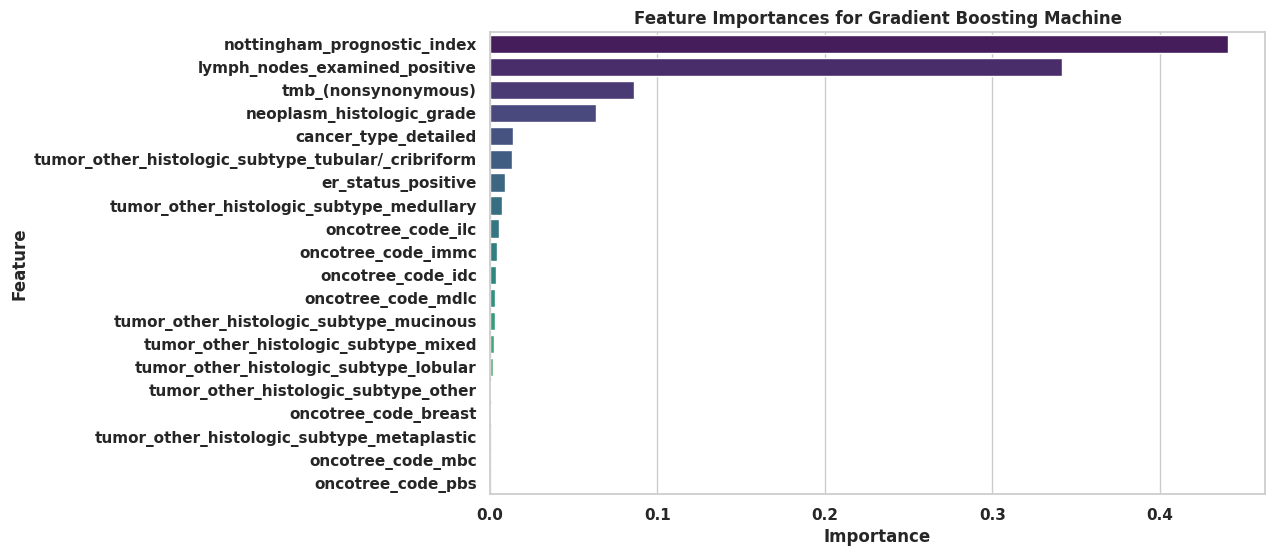

In [ ]:
# Get feature importances
feature_importances = best_gbm_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances for Gradient Boosting Machine', fontweight = 'bold')
plt.xlabel('Importance', fontweight = 'bold')
plt.ylabel('Feature', fontweight = 'bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

**Conclusion**

The identified top features, especially the Nottingham Prognostic Index, lymph nodes examined positive, and TMB, play crucial roles in predicting relapse status. Their significance suggests that both tumor characteristics and patient-related factors contribute significantly to the likelihood of relapse.

**Recommendation**

Healthcare professionals should prioritize monitoring and assessing these key factors when evaluating the risk of relapse in breast cancer patients. Additionally, targeted interventions and treatments may be developed based on the specific characteristics identified through these features to improve patient outcomes and reduce the risk of relapse.

**Future Work**

Further research could focus on refining the predictive models by incorporating additional clinical and molecular features to enhance the accuracy of relapse prediction. Moreover, longitudinal studies tracking patient outcomes over time can provide valuable insights into the dynamic nature of relapse risk and inform personalized treatment strategies. Additionally, investigating the underlying biological mechanisms linking these features to relapse can deepen our understanding of breast cancer progression and potentially uncover novel therapeutic targets